In [2]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from IPython.display import set_matplotlib_formats
set_matplotlib_formats('retina')
from mpl_toolkits.axes_grid1 import make_axes_locatable

In [28]:
## Deterministic network
## Time for 100 epochs
nbins = [2,4,8,10,12,14]#,16,18,20,22,24] # batchsize 
ipu = [189.24, 162.52, 250.53, 172.22, 151.53, 186.95]#, 135.83, 146.28, 167.09, 139.29, 152.19]
gpu = [2082.35, 1079.45, 589.62, 484.49, 474.81, 442.94]#, 369.18, 370.87, 318.01, 336.10, 323.82]

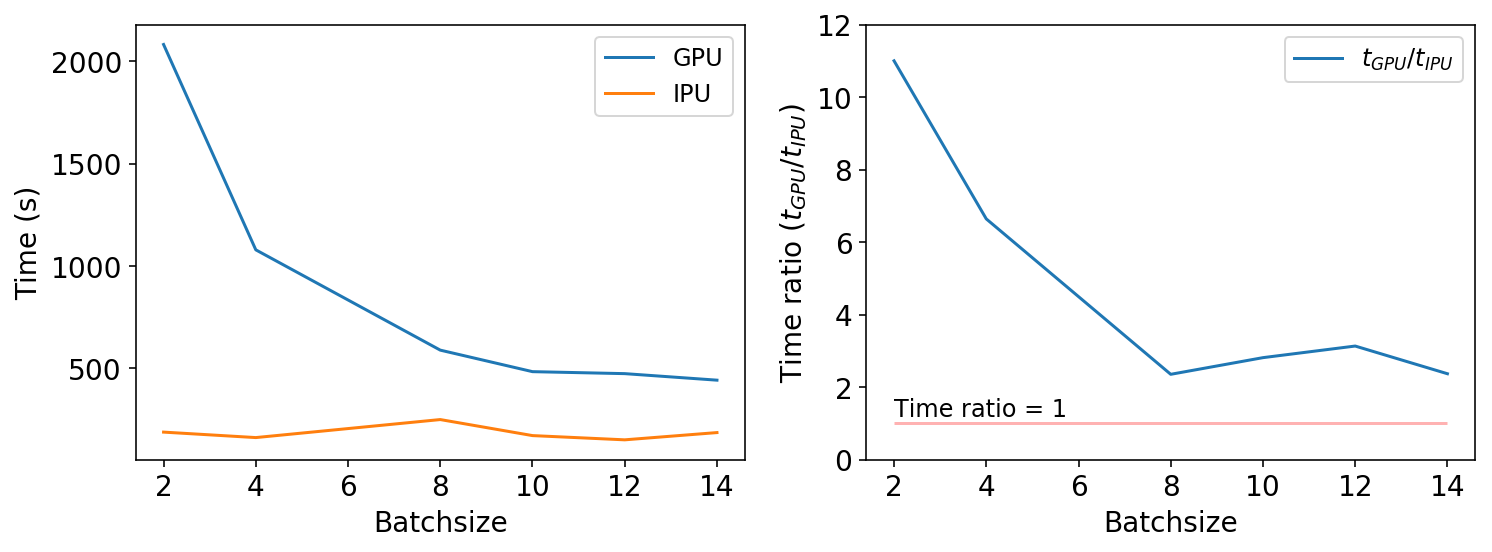

In [30]:
def plot_benchmarck(nbins, ipu, gpu, max_batchsize):
    fig, axes = plt.subplots(1,2, figsize = (12,4))
    axes[0].plot(nbins, gpu, '-', label = 'GPU')
    axes[0].plot(nbins, ipu, '-', label = 'IPU')
    axes[0].legend(fontsize = 12)
    axes[0].set_xlabel('Batchsize', fontsize = 14)
    axes[0].set_ylabel('Time (s)', fontsize = 14)
    axes[0].tick_params(axis='both', which='major', labelsize=14)
    
    time_ratio = np.array(gpu)/np.array(ipu)
    axes[1].plot(nbins, time_ratio, '-', label = '$t_{GPU}/t_{IPU}$')
    axes[1].set_xlabel('Batchsize', fontsize = 14)
    axes[1].set_ylabel('Time ratio ($t_{GPU}/t_{IPU}$)', fontsize = 14)
    axes[1].hlines(1, 2, max_batchsize, color = 'red', alpha = 0.3)
    axes[1].text(2, 1.2, 'Time ratio = 1', fontsize = 12) 
    axes[1].tick_params(axis='both', which='major', labelsize=14)
    axes[1].set_ylim(0,12)
    axes[1].legend(fontsize = 12)
    
    return fig

fig = plot_benchmarck(nbins, ipu, gpu,14)
plt.savefig('../img/training_time_det.pdf',dpi = 300, bbox_inches='tight')

In [47]:
## Bayesian network
## Time for 100 epochs
nbins_bayesian = [2,4,6,8]#,10,12,14]#,16,18,20,22,24] # batchsize 
ipu_bayesian = [373.44, 271.09, 234.27, 219.62]#,0,0,0]#, ]
gpu_bayesian = [3344.43, 1717.58, 1349.23, 977.42]#, 842.17, 788.45, 732.71]#, 617.72, 595.17, 517.28, 545.45, 522.48]

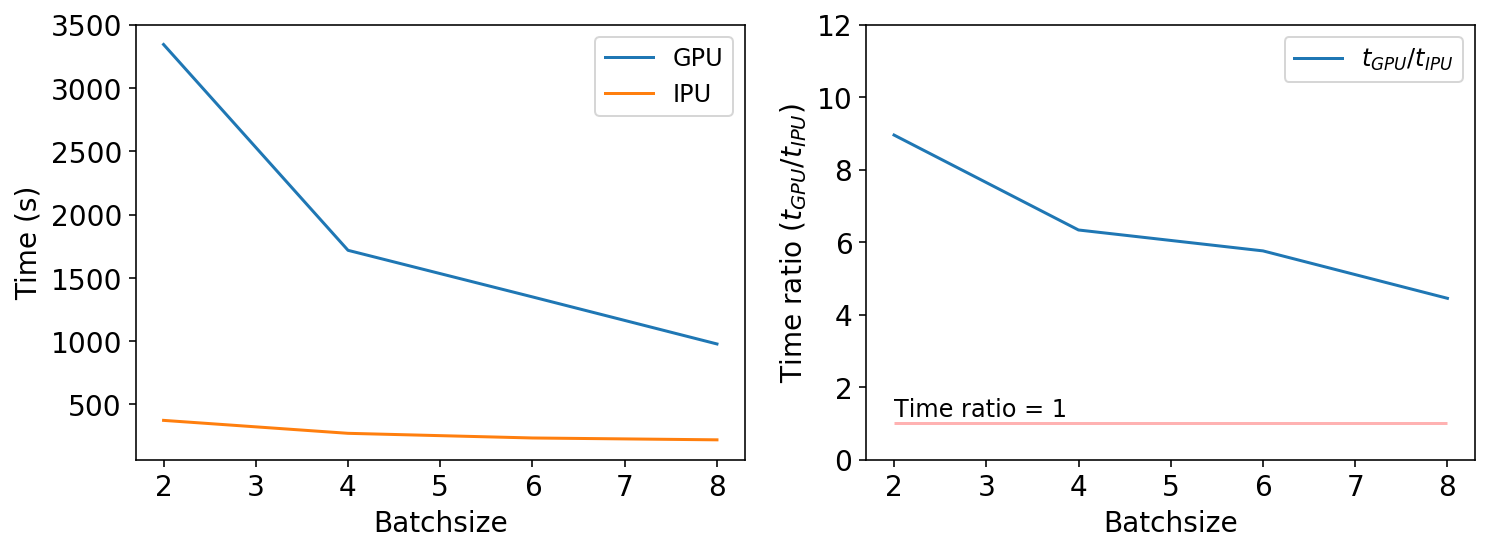

In [46]:
fig = plot_benchmarck(nbins_bayesian, ipu_bayesian, gpu_bayesian,8)
plt.savefig('../img/training_time_BNN.pdf',dpi = 300, bbox_inches='tight')

In [1]:
## Inference in image generation from trained VAE latent space
## Sampling only
nbins_inf_gen = [1,10,100,1000,10000,100000,1000000] # number of events to generate
ipu_inf_gen = [0.4883, 0.5404, 0.7090, 1.1188, 1.7617, 9.9887, 73.8597] # time in seconds
gpu_inf_gen = [0.3771, 0.3844, 0.3847, 0.3838, 0.3758, 0.7602, 7.4482] # time in seconds

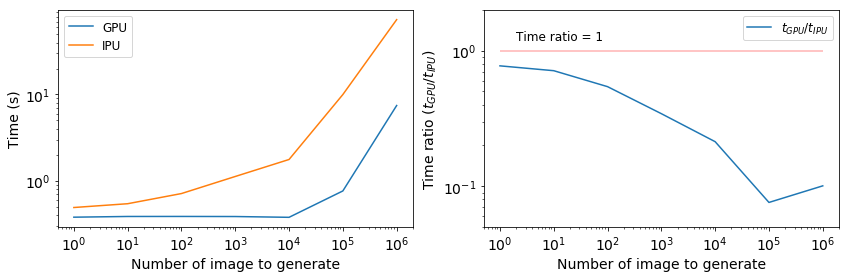

In [26]:
fig, axes = plt.subplots(1,2, figsize = (14,4))
axes[0].plot(nbins_inf_gen, gpu_inf_gen, '-', label = 'GPU')
axes[0].plot(nbins_inf_gen, ipu_inf_gen, '-', label = 'IPU')
axes[0].legend(fontsize = 12)
axes[0].set_xlabel('Number of image to generate', fontsize = 14)
axes[0].set_ylabel('Time (s)', fontsize = 14)
axes[0].tick_params(axis='both', which='major', labelsize=14)
axes[0].set_xscale('log')
axes[0].set_yscale('log')

time_ratio = np.array(gpu_inf_gen)/np.array(ipu_inf_gen)
axes[1].plot(nbins_inf_gen, time_ratio, '-', label = '$t_{GPU}/t_{IPU}$')
axes[1].set_xlabel('Number of image to generate', fontsize = 14)
axes[1].set_ylabel('Time ratio ($t_{GPU}/t_{IPU}$)', fontsize = 14)
axes[1].hlines(1, 1, np.max(nbins_inf_gen), color = 'red', alpha = 0.3)
axes[1].text(2, 1.2, 'Time ratio = 1', fontsize = 12) 
axes[1].tick_params(axis='both', which='major', labelsize=14)
axes[1].set_ylim(0.05,2)
axes[1].legend(fontsize = 12)
axes[1].set_xscale('log')
axes[1].set_yscale('log')

plt.savefig('../img/inference_time_generation.pdf',dpi = 300, bbox_inches='tight')

In [27]:
## Inference in image generation from trained VAE latent space
## Sampling + inference
nbins_inf_gen = [1,10,100,500,1000, 5000] # number of events to generate
ipu_inf_gen = [0.5189, 0.6216, 0.9435,1.7203, 2.4671, 7.6630] # time in seconds
gpu_inf_gen = [0.8849, 0.8945, 0.9842,1.3849, 1.7513, 3.3849] # time in seconds

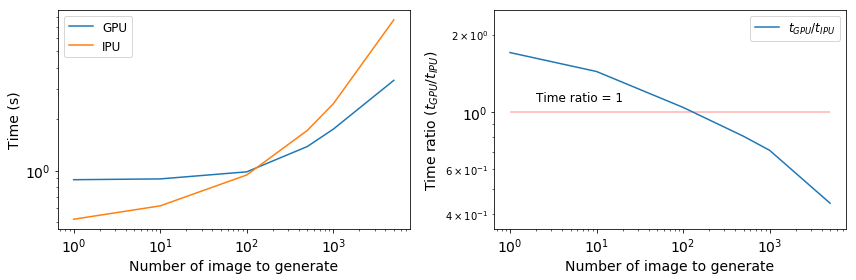

In [35]:
fig, axes = plt.subplots(1,2, figsize = (12,4))
axes[0].plot(nbins_inf_gen, gpu_inf_gen, '-', label = 'GPU')
axes[0].plot(nbins_inf_gen, ipu_inf_gen, '-', label = 'IPU')
axes[0].legend(fontsize = 12)
axes[0].set_xlabel('Number of image to generate', fontsize = 14)
axes[0].set_ylabel('Time (s)', fontsize = 14)
axes[0].tick_params(axis='both', which='major', labelsize=14)
axes[0].set_xscale('log')
axes[0].set_yscale('log')

time_ratio = np.array(gpu_inf_gen)/np.array(ipu_inf_gen)
axes[1].plot(nbins_inf_gen, time_ratio, '-', label = '$t_{GPU}/t_{IPU}$')
axes[1].set_xlabel('Number of image to generate', fontsize = 14)
axes[1].set_ylabel('Time ratio ($t_{GPU}/t_{IPU}$)', fontsize = 14)
axes[1].hlines(1, 1, np.max(nbins_inf_gen), color = 'red', alpha = 0.3)
axes[1].text(2, 1.1, 'Time ratio = 1', fontsize = 12) 
axes[1].tick_params(axis='both', which='major', labelsize=14)
axes[1].set_ylim(0.35,2.5)
axes[1].legend(fontsize = 12)
axes[1].set_xscale('log')
axes[1].set_yscale('log')

plt.tight_layout()
plt.savefig('../img/inference_time_generation.pdf',dpi = 300, bbox_inches='tight')


In [36]:
## Inference for shape prediction
nbins_inf_param = [2, 4, 8, 10, 12, 14, 16, 32] # number of events to generate
ipu_inf_param = [26.2142, 31.2122, 40.6395, 43.9961, 47.3092, 47.8476, 50.6683, 67.9010] # time in seconds
gpu_inf_param = [1.9428, 1.1428, 0.7760, 0.6940, 0.7154, 0.6728, 0.6190 ,0.5535] # time in seconds

In [ ]:
fig, axes = plt.subplots(1,2, figsize = (12,4))
axes[0].plot(nbins_inf_param, gpu_inf_param, '-', label = 'GPU')
axes[0].plot(nbins_inf_param, ipu_inf_param, '-', label = 'IPU')
axes[0].legend(fontsize = 12)
axes[0].set_xlabel('Batchsize', fontsize = 14)
axes[0].set_ylabel('Time (s)', fontsize = 14)
axes[0].tick_params(axis='both', which='major', labelsize=14)
axes[0].set_xscale('log')
axes[0].set_yscale('log')

time_ratio = np.array(gpu_inf_param)/np.array(ipu_inf_param)
axes[1].plot(nbins_inf_param, time_ratio, '-', label = '$t_{GPU}/t_{IPU}$')
axes[1].set_xlabel('Batchsize', fontsize = 14)
axes[1].set_ylabel('Time ratio ($t_{GPU}/t_{IPU}$)', fontsize = 14)
axes[1].hlines(1, 2, np.max(nbins_inf_param), color = 'red', alpha = 0.3)
axes[1].text(2, 0.9, 'Time ratio = 1', fontsize = 12) 
axes[1].tick_params(axis='both', which='major', labelsize=14)
axes[1].set_ylim(0.001,1.5)
axes[1].legend(fontsize = 12)
axes[1].set_xscale('log')
axes[1].set_yscale('log')

plt.tight_layout()
plt.savefig('../img/inference_time_prediction.pdf',dpi = 300, bbox_inches='tight')